# Explore the features

Reference:
[Exploring features](https://www.kaggle.com/code/cast42/exploring-features/notebook#var3:-nationality-of-the-customer)

In [286]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

train <- read.csv('/kaggle/input/santander-customer-satisfaction/train.csv')
test <- read.csv('/kaggle/input/santander-customer-satisfaction/test.csv')

cat('train row length:')
nrow(train)
cat('test row length:')
nrow(test)

train row length:

[1] 76020

test row length:

[1] 75818

## Start to explore

In [287]:
cat("train")
head(train)

cat('\n\n')
cat("test")
head(test)

train

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,⋯,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,2,23,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,39205.17,0
2,3,2,34,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,49278.03,0
3,4,2,23,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,67333.77,0
4,8,2,37,0,195,195,0,0,0,0,⋯,0,0,0,0,0,0,0,0,64007.97,0
5,10,2,39,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,117310.98,0
6,13,2,23,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,87975.75,0




test

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,⋯,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,2,32,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,40532.10
2,5,2,35,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,45486.72
3,6,2,23,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,46993.95
4,7,2,24,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,187898.61
5,9,2,23,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,73649.73
6,11,2,43,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,53250.87


In [288]:
# check NA 
for (feature in colnames(train)) {
    if(colSums(is.na(train[feature]))) {
        print(colSums(is.na(train[feature])))
    }
}

for (feature in colnames(test)) {
    if(colSums(is.na(test[feature]))) {
        print(colSums(is.na(test[feature])))
    }
}

**There is no NA in dataset, so it won't print anything.**

Number: 
    0     1 
73012  3008 


Percentage:


         0          1 
0.96043147 0.03956853 

Satisfied,Unsatisfied
<dbl>,<dbl>
0.9604315,0.03956853


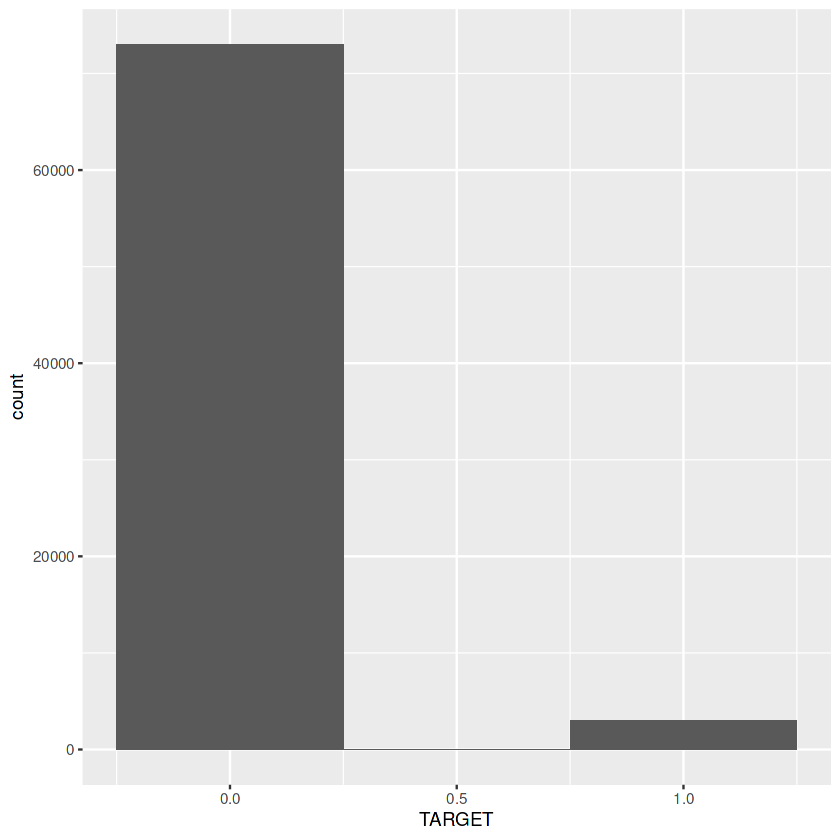

In [289]:
# the histogram shows that the dataset is extremely unbalanced
# There are 73012 satisfied custumer, However there are only 3008 unsatisfied customer 

cat("Number: ")
print(table(train$TARGET))

cat("\n\n")
cat("Percentage:")
value_counts <- table(train$TARGET)
value_counts / length(train$TARGET)

#########
target_length <- length(train$TARGET)
Unsatisfied <- sum(train$TARGET)
Satisfied <- target_length - Unsatisfied

df <- data.frame("Satisfied" = Satisfied / target_length, "Unsatisfied" = Unsatisfied / target_length)

# Unsatisfied ratio is about 4%
cat("\n\n")
df

base_plot <- ggplot()
base_plot <- base_plot + geom_histogram(data = train, aes(x = TARGET), bins=3)
base_plot

## var3: nationality of the customer

In [290]:
value_counts <- table(train$var3)

# Top-10 most common values
head(sort(value_counts, decreasing = TRUE), 10)


      2       8 -999999       9       3       1      13       7       4      12 
  74165     138     116     110     108     105      98      97      86      85 

In [291]:
# -999999 means the nationality is unknown, replace it with the most commen value 2 in this column
train <- train %>% 
    mutate(
        var3 = ifelse(train$var3 == -999999, 2, train$var3),
    )

value_counts <- table(train$var3)
head(sort(value_counts, decreasing = TRUE), 10)


    2     8     9     3     1    13     7     4    12     6 
74281   138   110   108   105    98    97    86    85    82 

## Add feature that counts the number of zeros in a row

In [292]:
##### 0 count per line
count0 <- function(x) {
  return( sum(x == 0) )
}
train$n0 <- apply(train, 1, FUN=count0)
test$n0 <- apply(test, 1, FUN=count0)

cat("train")
head(train[, c('ID', 'n0')])

cat('\n\n')
cat("test")
head(test[, c('ID', 'n0')])

train

,ID,n0
,<int>,<int>
1,1,356
2,3,330
3,4,341
4,8,310
5,10,320
6,13,356




test

,ID,n0
,<int>,<int>
1,2,338
2,5,341
3,6,322
4,7,355
5,9,340
6,11,355


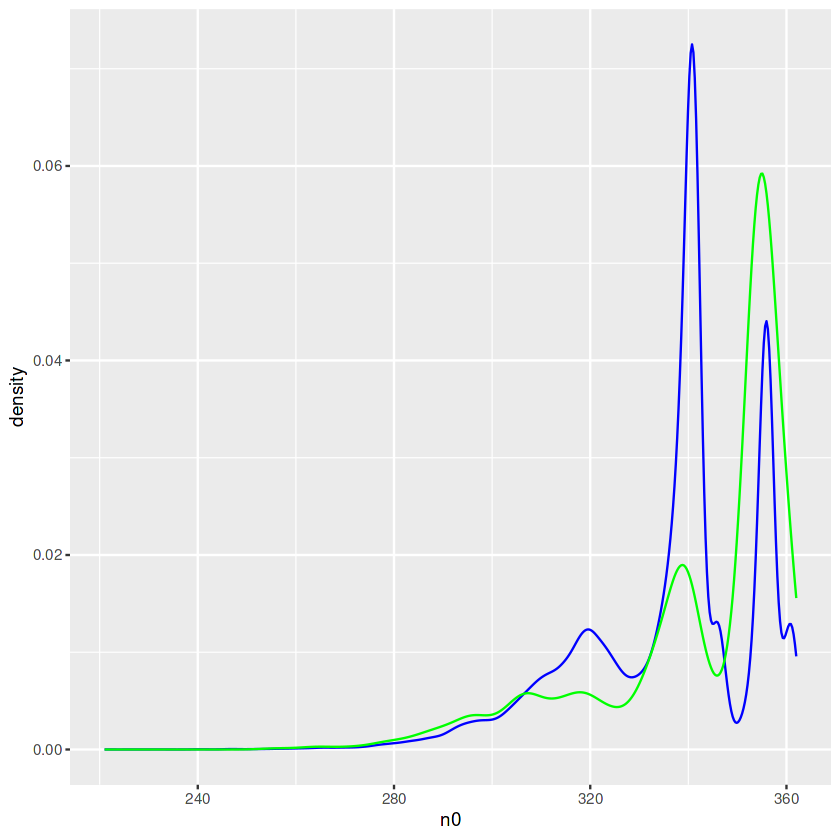

In [293]:
# Unhappy customers have a lot of features that are zero
satisfied_df <- train %>%
    filter (
        train$TARGET == 0
    )

unsatisfied_df <- train %>%
    filter (
        train$TARGET == 1
    )

# Computes and draws kernel density estimate, which is a smoothed version of the histogram
base_plot <- ggplot()
base_plot <- base_plot + geom_density(data = satisfied_df, aes(x = n0), colour = "blue")
base_plot <- base_plot + geom_density(data = unsatisfied_df, aes(x = n0), colour = "green")
base_plot

## num_var4 : number of bank products

Number of bank products:
    0     1     2     3     4     5     6     7 
19528 38147 12692  4377  1031   203    36     6 


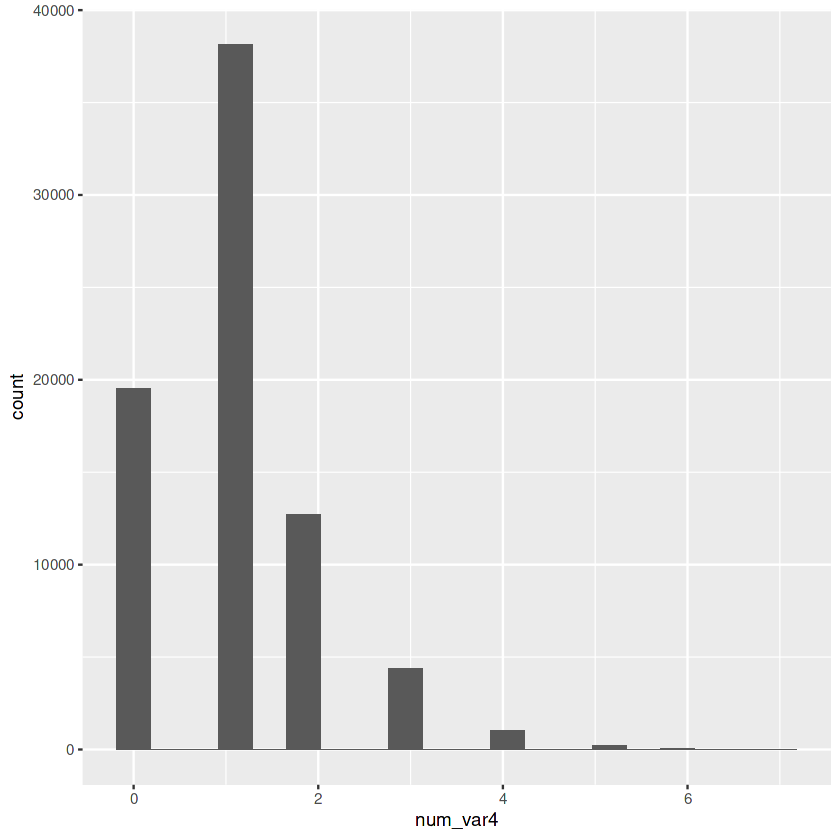

In [294]:
cat("Number of bank products:")

# Most customers have 1 product with the bank
print(table(train$num_var4))

base_plot <- ggplot()
base_plot <- base_plot + geom_histogram(data = train, aes(x = num_var4), bins=20)
base_plot

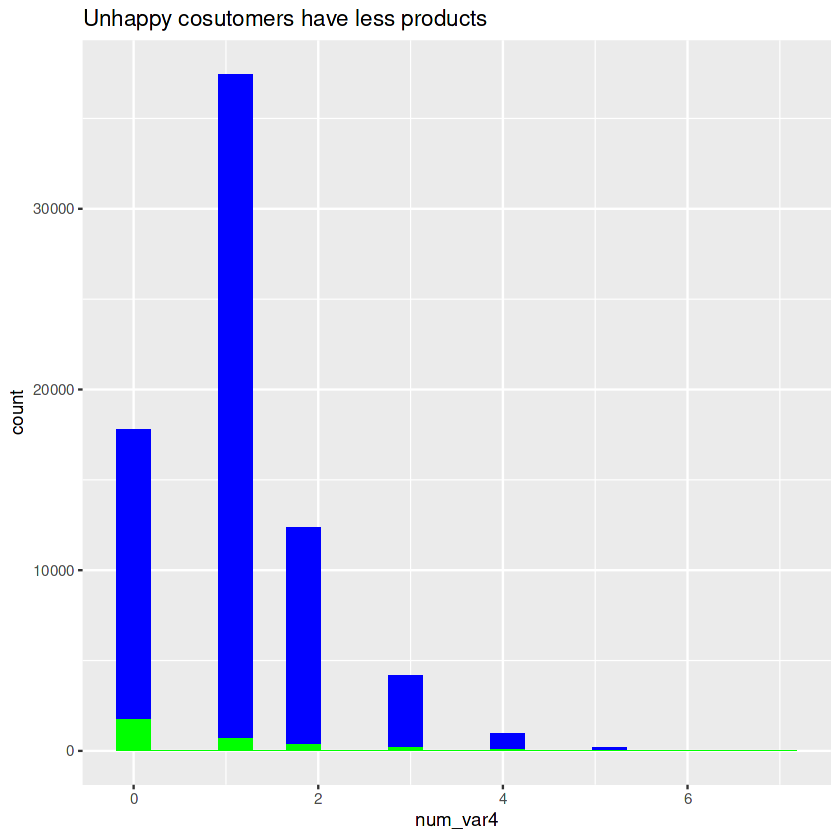

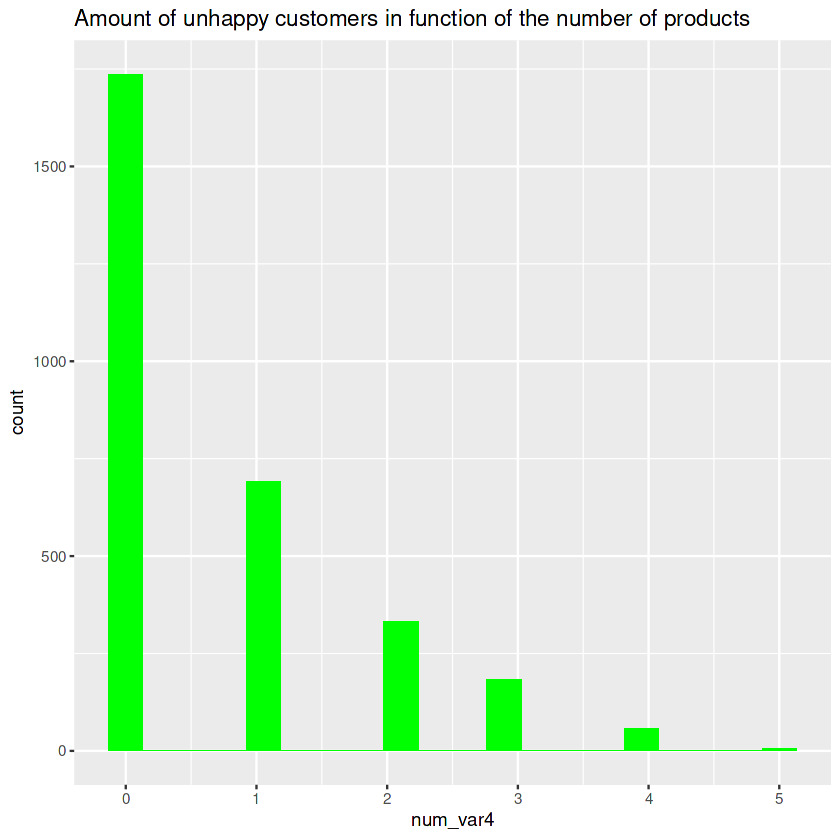

In [295]:
# Shows the comparison of satisfied customer (blue) & unsatisfied customer (green) in num_var4
satisfied_df <- train %>%
    filter (
        train$TARGET == 0
    )

unsatisfied_df <- train %>%
    filter (
        train$TARGET == 1
    )

base_plot <- ggplot()
base_plot <- base_plot + ggtitle("Unhappy cosutomers have less products")
base_plot <- base_plot + geom_histogram(data = satisfied_df, aes(x = num_var4), bins=20, fill = "blue")
base_plot <- base_plot + geom_histogram(data = unsatisfied_df, aes(x = num_var4), bins=20, fill = "green")
base_plot


base_plot2 <- ggplot()
base_plot2 <- base_plot2 + ggtitle("Amount of unhappy customers in function of the number of products")
base_plot2 <- base_plot2 + geom_histogram(data = unsatisfied_df, aes(x = num_var4), bins=20, fill = "green")
base_plot2

## Var38: The mortage value with the bank.

In [296]:
# var38 is important in xgboost or RandomForest classifier Model
summary(train$var38)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    5164    67871   106409   117236   118756 22034739 

In [297]:
# How is var38 looking when customer is unhappy?
df <- train %>% 
    filter(
        train$TARGET == 1
    )

summary(df$var38)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11137   57161   86220   99678  117311 3988595 

In [298]:
head(train$var38, 100)

[1]  39205.17  49278.03  67333.77  64007.97 117310.98  87975.75  94956.66
  [8] 251638.95 101962.02 356463.06 125424.06  75368.52 122220.09 118436.97
 [15]  95294.13 104403.87 117310.98 153014.13 168943.23  96601.14  69165.03
 [22]  63445.56 117310.98  59575.62 117310.98  78390.81  86262.21  55568.10
 [29]  34880.28 126815.97 101789.79  63324.90 123113.46  60115.23 117310.98
 [36]  66112.08  47546.46 117310.98  44631.63  75546.15 112968.33 150347.88
 [43]  96674.94  56161.53 123380.37  90175.05 155235.30  43998.48 114497.61
 [50] 237000.24 245388.78  76889.91  84896.85  56913.06  55562.91  67685.46
 [57]  44286.45  99522.72 101700.48 336550.11 149904.78  59325.75  51689.55
 [64] 191661.84 169579.74  95834.85  39305.16  41807.67 165258.42  36490.74
 [71] 117310.98  27443.34  65554.47  54182.85 150676.41  41508.24 117310.98
 [78] 105994.47 117310.98 117310.98 124988.25 190417.68 125764.98 255365.25
 [85] 472322.10 204085.62 117310.98 101485.23 174881.82 117310.98 102074.61
 [92]  48160.14  83856.36 117310.98 149896.02 158522.37 208818.99  23169.78
 [99] 200807.07 165635.10

df$var38

[1]  39205.17  49278.03  67333.77  64007.97 117310.98  87975.75

Mode: 

[1] 117311

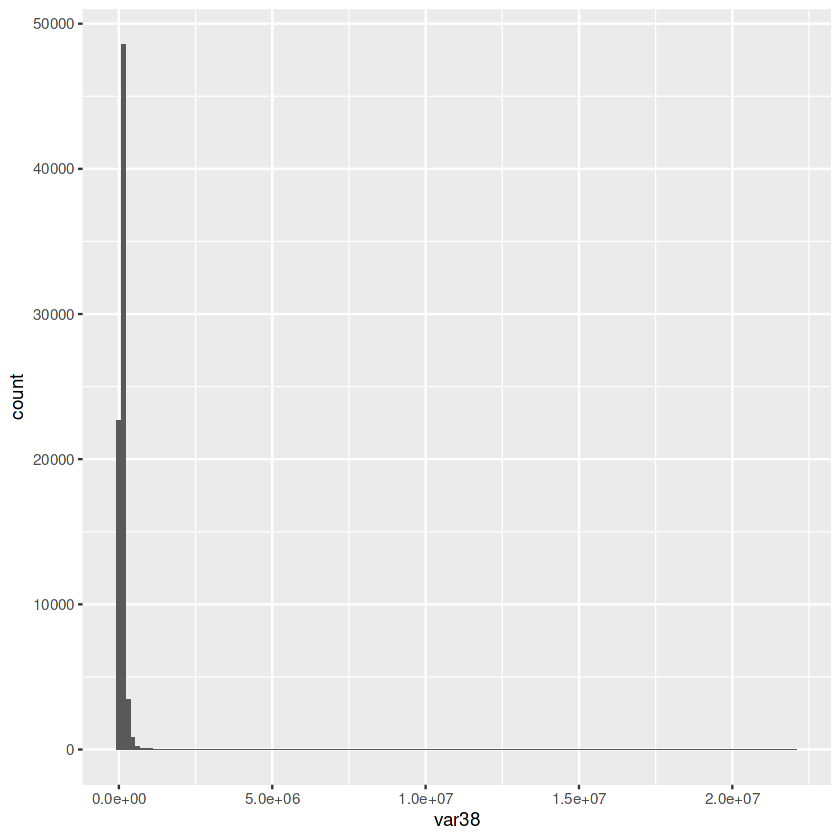

In [299]:
# Histogram for var 38 is not Normal Distributed
# This graph is not easy to understand
df <- train

cat("df$var38")
head(df$var38)

mode_value <- df %>%
  count(var38) %>%
  filter(n == max(n)) %>%
  pull(var38)

cat("Mode: ")
mode_value

base_plot <- ggplot()
base_plot <- base_plot + geom_histogram(data = df, aes(x = var38), bins=150)
base_plot

df$var38

[1] 10.57656 10.80523 11.11742 11.06676 11.67258 11.38482

Mode: 

[1] 11.67258

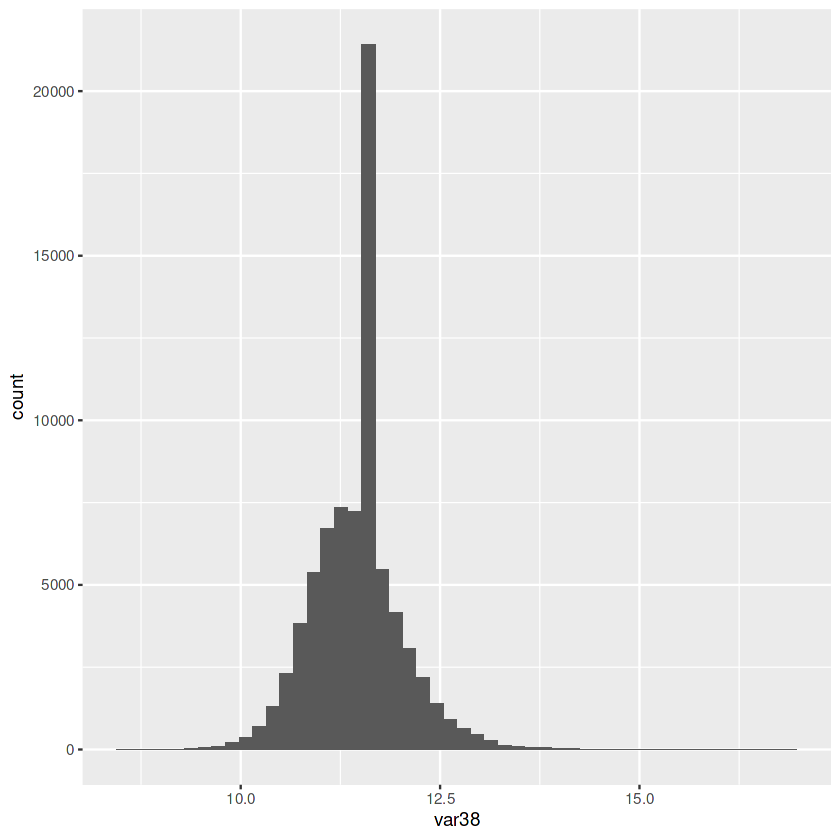

In [300]:
# Histogram for var38 in log transformed (Make it understandable)
df <- train %>%
    mutate(
        var38 = log(var38)
    )

cat("df$var38")
head(df$var38)

mode_value <- df %>%
  count(var38) %>%
  filter(n == max(n)) %>%
  pull(var38)

cat("Mode: ")
mode_value

base_plot <- ggplot()
base_plot <- base_plot + geom_histogram(data = df, aes(x = var38), bins=50)
base_plot

#### Note the the geom_histogram compute the counts for bins not for each single value
e.g. by default the data is split into 30 bins and the displayed values show the count per bin.

In [301]:
# Most common values for var38? (Mode)
head(sort(table(train$var38), decreasing = TRUE), 10)


117310.979016494        451931.22        463625.16         104563.8 
           14868               16               12               11 
       288997.44        236690.34         67088.31        104644.41 
              11                8                7                7 
       125722.44        128318.52 
               7                7 

The value 117310.979016 appears 14868 times in colum var38

Mean of the other values:

[1] 117217.5



Other values in var38 (only show first 10):


451931.22 463625.16  104563.8 288997.44 236690.34  67088.31 104644.41 125722.44 
       16        12        11        11         8         7         7         7 
128318.52 329603.97 
        7         7 

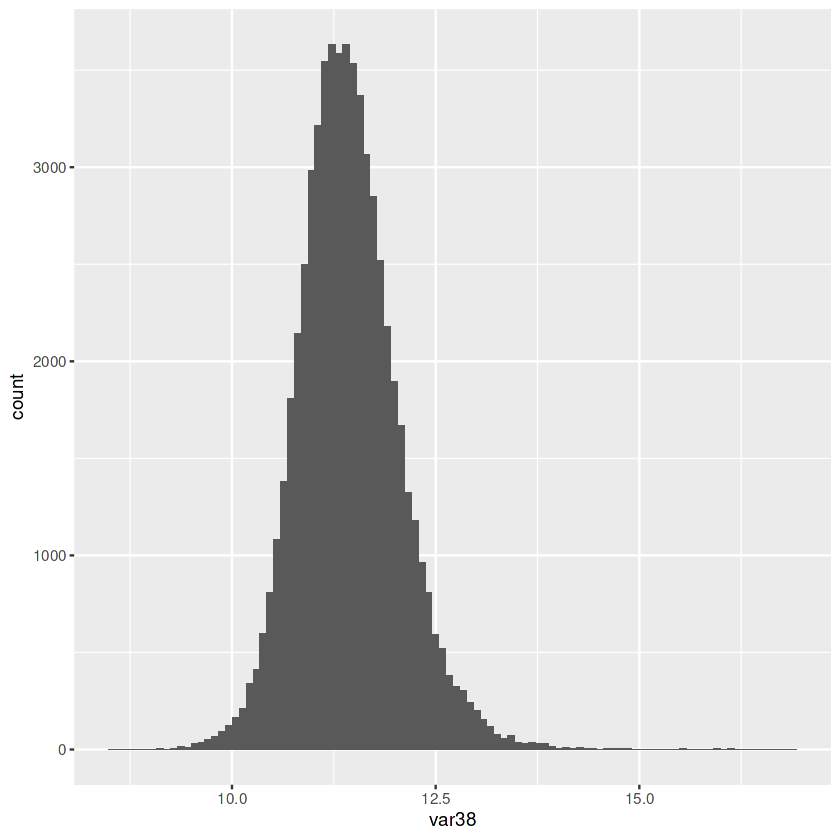

In [302]:
# The most common value is very close to the mean of the other values
df <- train %>%
    filter(
        # A safe way of comparing if two vectors of floating point numbers are/are'nt equal.
        !near(train$var38, 117310.979016494)
    )

cat("Mean of the other values:")
mean(df$var38)

cat('\n\n')
cat("Other values in var38 (only show first 10):")
head(sort(table(df$var38), decreasing = TRUE), 10)

df <- df %>%
    mutate(
        var38 = log(var38)
    )

base_plot <- ggplot()
base_plot <- base_plot + geom_histogram(data = df, aes(x = var38), bins=100)
base_plot

The above plot looks like the Normal Distribution, which suggest we split up var38 into two variables

In [303]:
# Create additional features
# var38mc == 1 when var38 has the most common value and 0 otherwise
# logvar38 is log transformed feature when var38mc is 0, zero otherwise

train <- train %>%
    # This column mark the most common value
    mutate(
        var38mc = ifelse(near(var38, 117310.979016494), 1, 0),
    ) %>%
    
    # This column will be normal distributed
    mutate (
       logvar38 = ifelse(var38mc == 0, log(var38), 0)
    )

head(train[, c('var38', 'var38mc', 'logvar38')])

cat('\n')
cat('Number of NA in var38:')
sum(is.na(train$var38))

cat('Number of NA in var38mc:')
sum(is.na(train$var38mc))

cat('Number of NA in logvar38:')
sum(is.na(train$logvar38))

cat('Number of NULL in var38:')
sum(is.null(train$var38))

cat('Number of NULL in var38mc:')
sum(is.null(train$var38mc))

cat('Number of NULL in logvar38:')
sum(is.null(train$logvar38))

,var38,var38mc,logvar38
,<dbl>,<dbl>,<dbl>
1,39205.17,0,10.57656
2,49278.03,0,10.80523
3,67333.77,0,11.11742
4,64007.97,0,11.06676
5,117310.98,1,0.00000
6,87975.75,0,11.38482



Number of NA in var38:

[1] 0

Number of NA in var38mc:

[1] 0

Number of NA in logvar38:

[1] 0

Number of NULL in var38:

[1] 0

Number of NULL in var38mc:

[1] 0

Number of NULL in logvar38:

[1] 0

## var15: the age of the customer

The most important feature for XGBoost is var15

In [304]:
#  According to a Kaggle form post var15 is the age of the customer.
summary(train$var15)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   23.00   28.00   33.21   40.00  105.00 

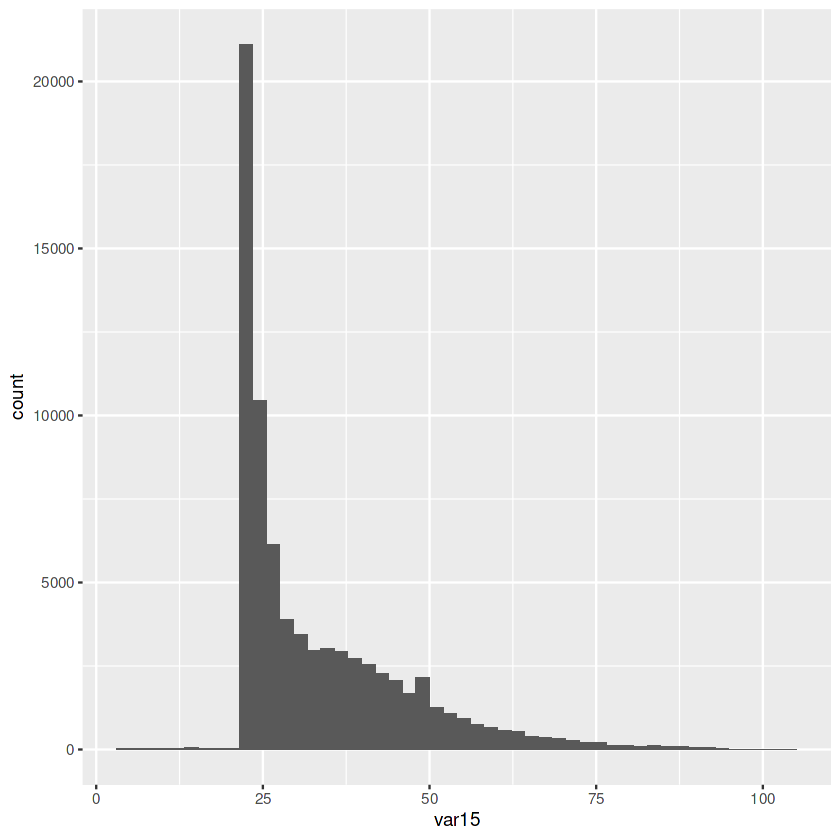

In [305]:
base_plot <- ggplot()
base_plot <- base_plot + geom_histogram(data = train, aes(x = var15), bins=50)
base_plot

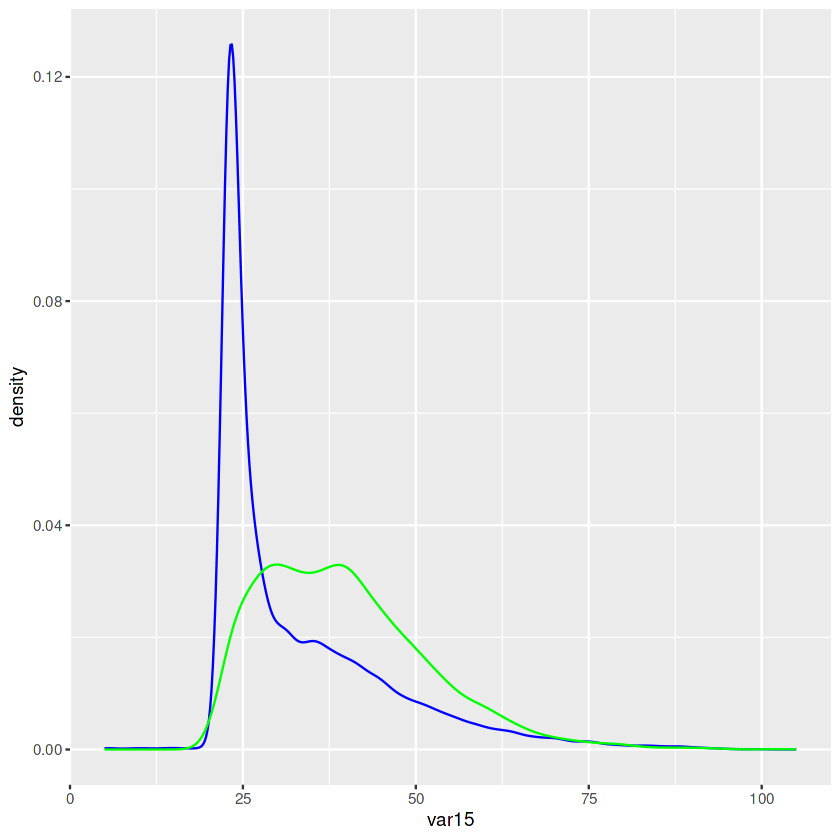

In [306]:
# The age density of satisfied & unsatisfied customers
satisfied_df <- train %>%
    filter (
        train$TARGET == 0
    )

unsatisfied_df <- train %>%
    filter (
        train$TARGET == 1
    )

# Unhappy customers are slightly older
base_plot <- ggplot()
base_plot <- base_plot + geom_density(data = satisfied_df, aes(x = var15), colour = "blue")
base_plot <- base_plot + geom_density(data = unsatisfied_df, aes(x = var15), colour = "green")
base_plot

## saldo_var30

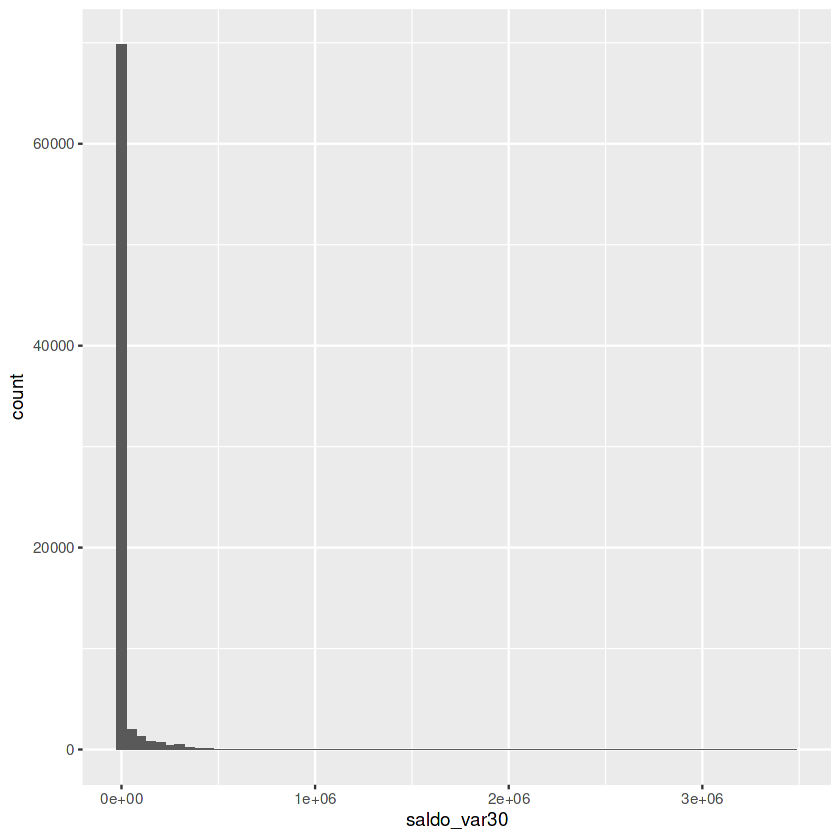

In [307]:
base_plot <- ggplot()
base_plot <- base_plot + geom_histogram(data = train, aes(x = saldo_var30), bins=70)
base_plot

,ID,log_saldo_var30
,<int>,<dbl>
1,1,0.000000
2,3,5.703782
3,4,1.098612
4,8,4.257313
5,10,11.813052
6,13,0.000000


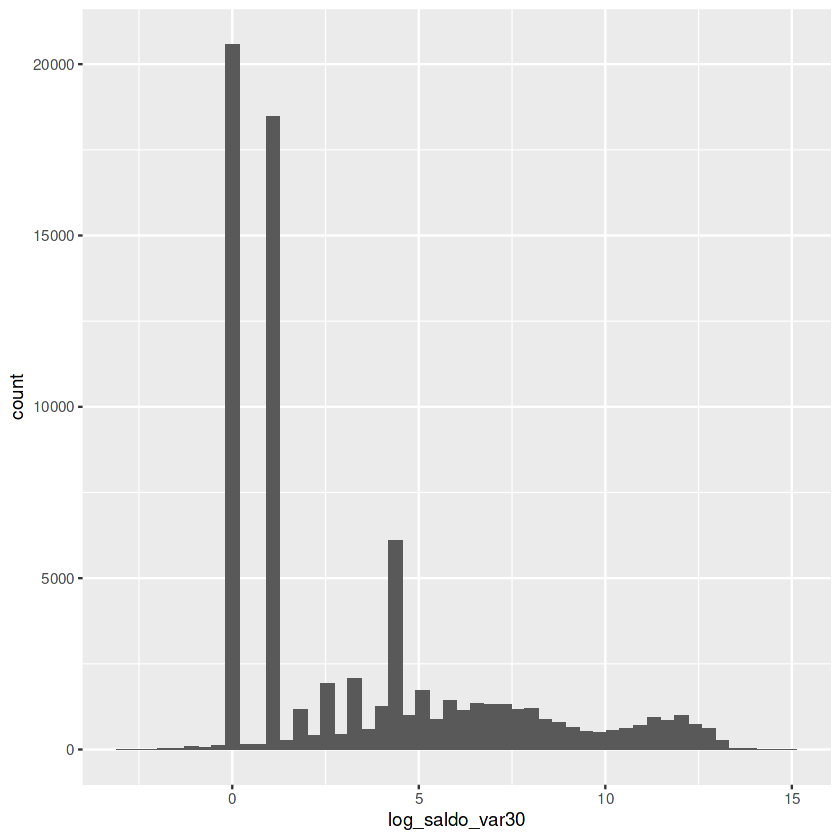

In [308]:
train$log_saldo_var30 <- train$saldo_var30

smallest_positive_value <- min(train$log_saldo_var30[train$log_saldo_var30 > 0], na.rm = TRUE)

train$log_saldo_var30[train$log_saldo_var30 < smallest_positive_value] <- smallest_positive_value

train <- train %>%
    mutate(
        log_saldo_var30 = ifelse(log_saldo_var30 > smallest_positive_value, log(log_saldo_var30), 0)
    )

head(train[, c('ID' ,'log_saldo_var30')])

base_plot <- ggplot()
base_plot <- base_plot + geom_histogram(data = train, aes(x = log_saldo_var30), bins=50)
base_plot

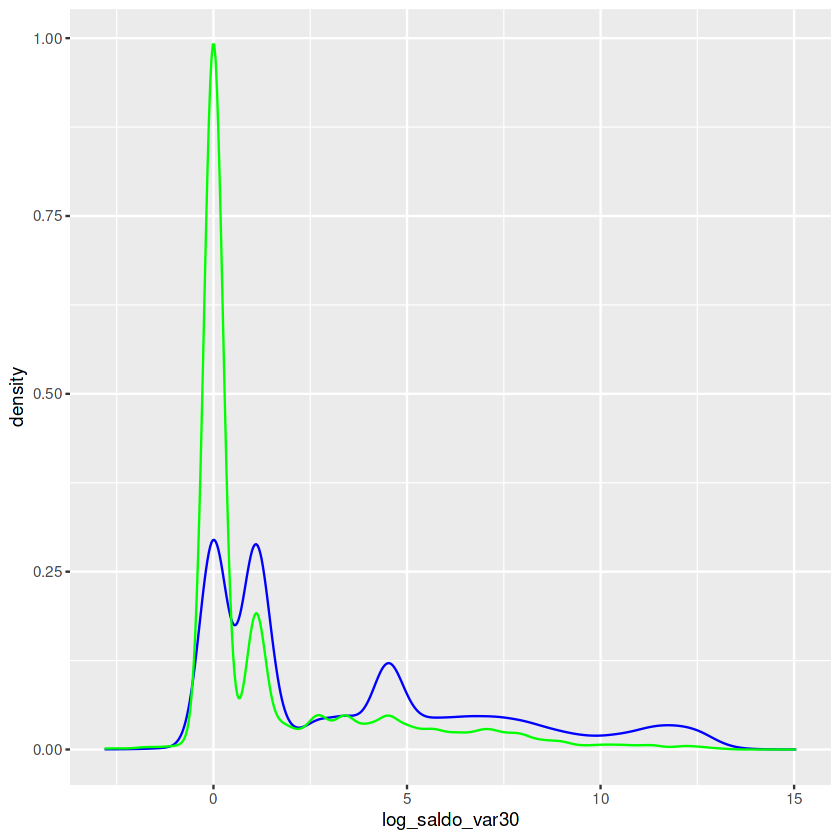

In [309]:
satisfied_df <- train %>%
    filter (
        train$TARGET == 0
    )
    
unsatisfied_df <- train %>%
    filter (
        train$TARGET == 1
    )

base_plot <- ggplot()
base_plot <- base_plot + geom_density(data = satisfied_df, aes(x = log_saldo_var30), colour = "blue")
base_plot <- base_plot + geom_density(data = unsatisfied_df, aes(x = log_saldo_var30), colour = "green")
base_plot

Note: 0 & 3 is common in saldo_var30

## The interaction between var15 (age) and var38

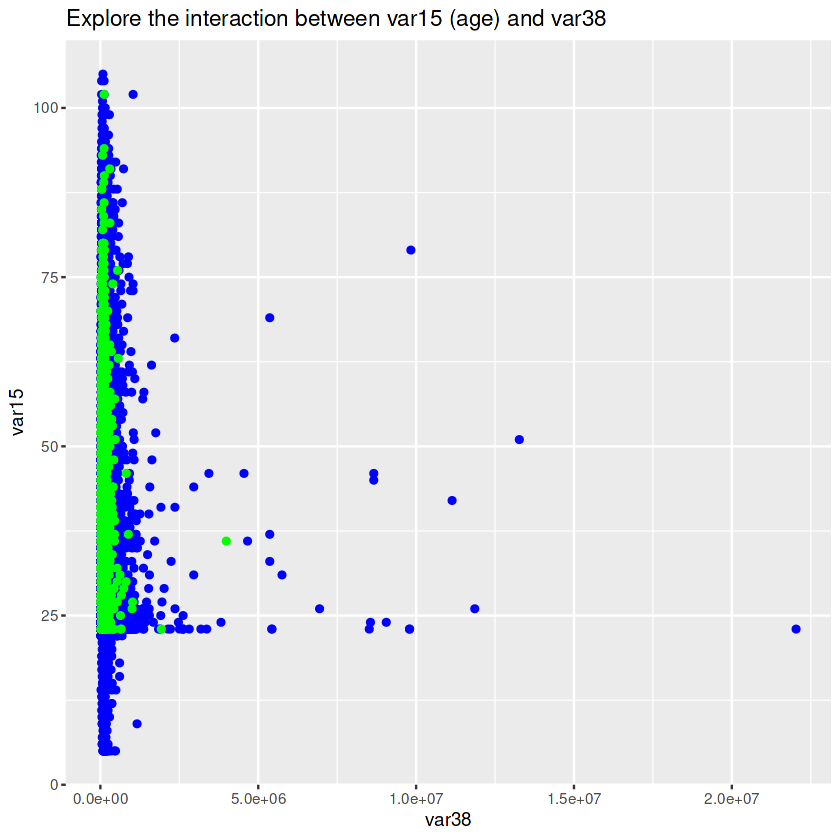

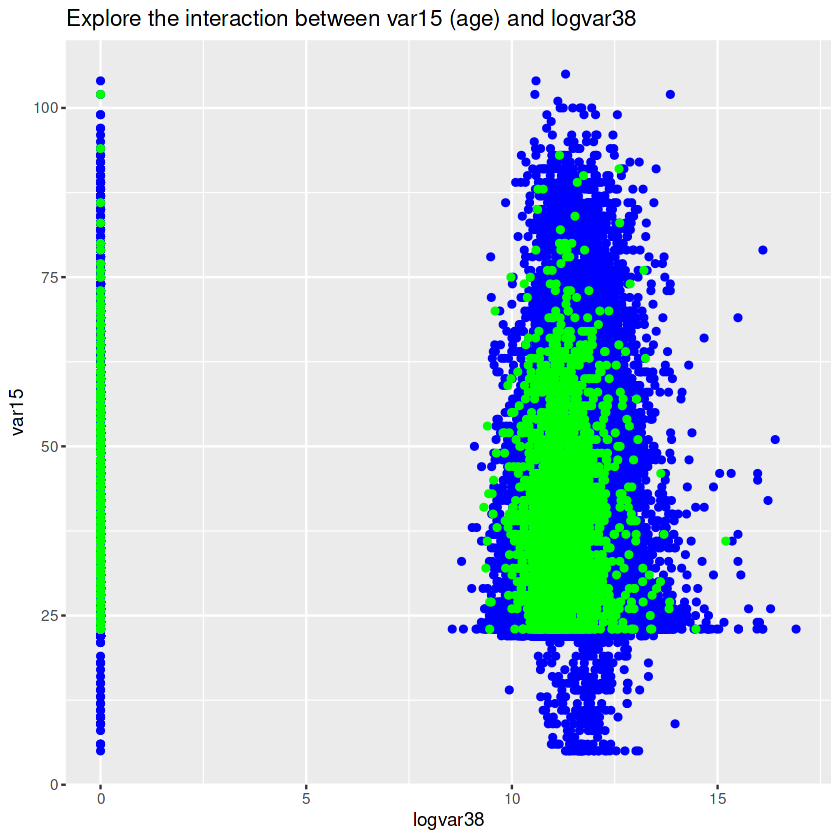

In [310]:
base_plot <- ggplot()
base_plot <- base_plot + ggtitle("Explore the interaction between var15 (age) and var38")
base_plot <- base_plot + geom_point(data = satisfied_df, aes(x = var38, y = var15), colour = "blue")
base_plot <- base_plot + geom_point(data = unsatisfied_df, aes(x = var38, y = var15), colour = "green")
base_plot

base_plot2 <- ggplot()
base_plot2 <- base_plot2 + ggtitle("Explore the interaction between var15 (age) and logvar38")
base_plot2 <- base_plot2 + geom_point(data = satisfied_df, aes(x = logvar38, y = var15), colour = "blue")
base_plot2 <- base_plot2 + geom_point(data = unsatisfied_df, aes(x = logvar38, y = var15), colour = "green")
base_plot2

# base_plot3 <- ggplot()
# base_plot3 <- base_plot3 + ggtitle("Explore the interaction between var15 (age) and var38mc")
# base_plot3 <- base_plot3 + geom_point(data = satisfied_df, aes(x = var38mc, y = var15), colour = "blue")
# base_plot3 <- base_plot3 + geom_point(data = unsatisfied_df, aes(x = var38mc, y = var15), colour = "green")
# base_plot3